In [30]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading and describing datasets

In [31]:
student_df = pd.read_csv('student.csv')
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [32]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [33]:
student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [34]:
#handing missing values
student_df.dropna(inplace=True) # Handle missing values

In [35]:
#handing duplicate values
student_df.drop_duplicates(inplace=True)

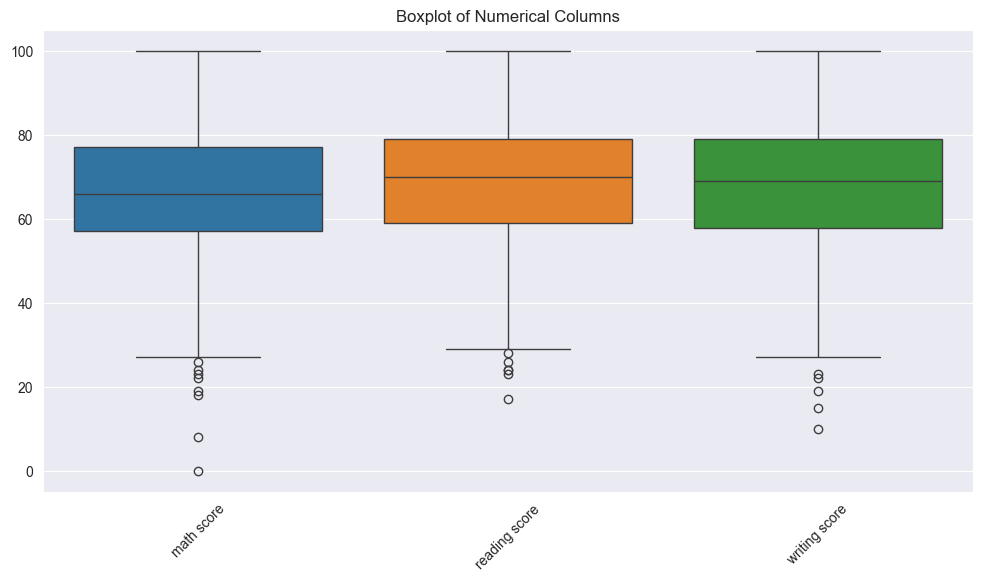

In [36]:
#handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=student_df)
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Removing outliers using IQR method
def remove_outliers_iqr(student_df, column):
    Q1 = student_df[column].quantile(0.25)
    Q3 = student_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return student_df[(student_df[column] >= lower_bound) & (student_df[column] <= upper_bound)]

# Removing outliers from math score
student_df = remove_outliers_iqr(student_df, 'math score')

# Removing outliers from reading score
student_df = remove_outliers_iqr(student_df, 'reading score')

# Removing outliers from writing score
student_df = remove_outliers_iqr(student_df, 'writing score')

Lets create a new column representing total marks which is nothing but sum of math, reading and writing scores. This can be useful for analyzing the overall performance of students across these subjects.

In [38]:
student_df['total score']=student_df['math score']+student_df['reading score']+student_df['writing score']
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


Converting Categorical Features Into Numerical:
To predict the total score of any student in the table, we need to take into consideration all the columns. So, let's convert the categorial data columns into numerical ones by using LabelEncoder function.

In [39]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
student_df['gender'] = label_encoder.fit_transform(student_df['gender'])
student_df['race/ethnicity'] = label_encoder.fit_transform(student_df['race/ethnicity'])
student_df['parental level of education'] = label_encoder.fit_transform(student_df['parental level of education'])
student_df['lunch'] = label_encoder.fit_transform(student_df['lunch'])
student_df['test preparation course'] = label_encoder.fit_transform(student_df['test preparation course'])

student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,0,1,1,1,1,72,72,74,218
1,0,2,4,1,0,69,90,88,247
2,0,1,3,1,1,90,95,93,278
3,1,0,0,0,1,47,57,44,148
4,1,2,4,1,1,76,78,75,229


Defining features and target variable

In [40]:
X=student_df.drop(['total score'], axis=1)
y=student_df['total score']

Basic EDA:

<Figure size 1200x500 with 0 Axes>

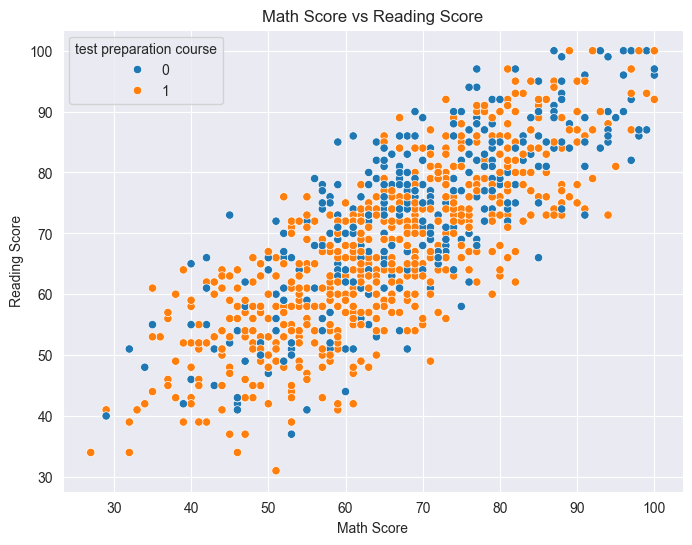

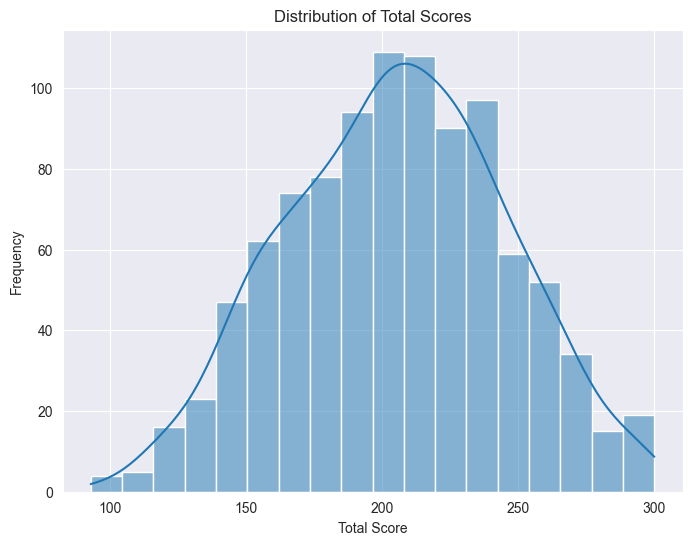

In [41]:
plt.figure(figsize=(12, 5))


# Visualizing the relationship between math score and reading score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=student_df, x='math score', y='reading score', hue='test preparation course')
plt.title('Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

# Visualize the distribution of total scores
plt.figure(figsize=(8, 6))
sns.histplot(student_df['total score'], kde=True)
plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()


Looking at the scatter plot, you can see that a positive linear relationship does appear between the math score and the reading. 
The above histogram depicts that our data set is normally distributed or symmetric. The mean, median, and mode are approximately equal. 

Heatmap:

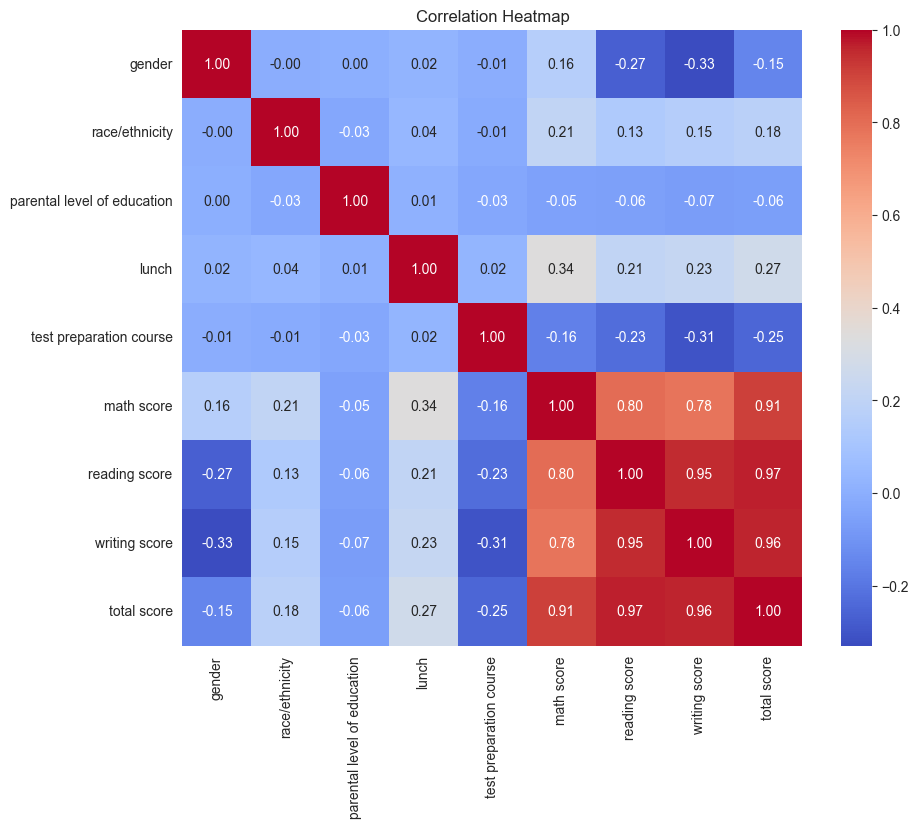

In [42]:
# Heatmap of correlation between features and target variable
plt.figure(figsize=(10, 8))
sns.heatmap(student_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics #for evaluation of the model
from sklearn.preprocessing import StandardScaler

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standard Scaling

In [44]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression:

In [45]:
# create a linear regression object
LR = LinearRegression()
# fit the model
LR.fit(X_train, y_train)
# predict the values for test data
predictions = LR.predict(X_test)

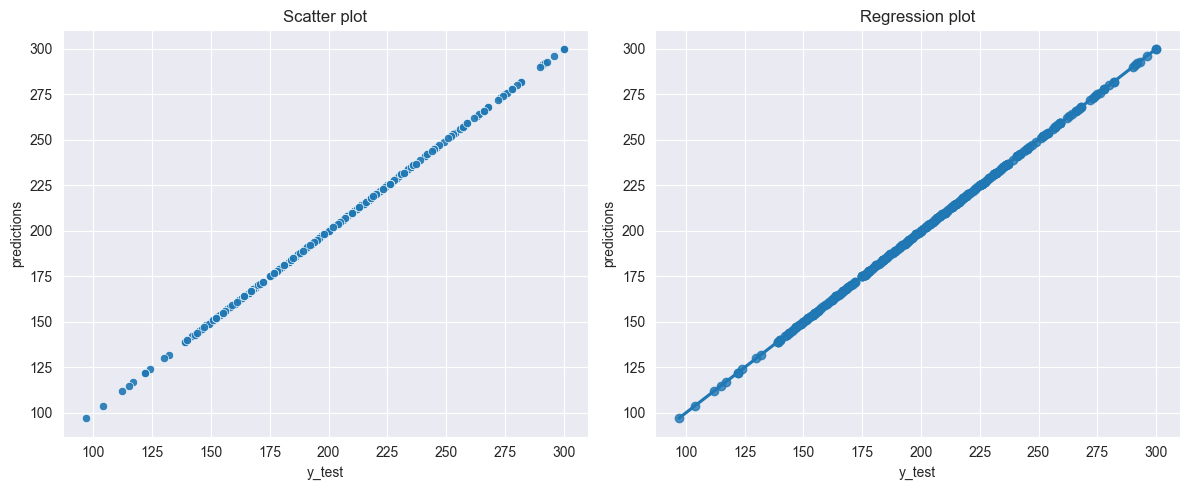

In [46]:
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=predictions, alpha=0.9);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Scatter plot')

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Regression plot')

plt.tight_layout()
plt.show()

Well as above plot shows our model fits very well and showing that the reg score is almost equal to 1,
But still we can evaluate the model by the help of the cost functions

Evaluation Metrics: 

In case of linear regression, we mostly use mean absolute error, mean squared error & root mean squared error as an evaluation metrics.
So lets import them and evaluate our model.

In [47]:
print('The regression score on training data : {}'.format(LR.score(X_train, y_train)))
print('The regression score on testing data : {}'.format(LR.score(X_test, y_test)))
print('\n')
print('The Mean absolute error:', metrics.mean_absolute_error(y_test, predictions))
print('The mean squared error:', metrics.mean_squared_error(y_test, predictions))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

The regression score on training data : 1.0
The regression score on testing data : 1.0


The Mean absolute error: 1.5219057245672418e-14
The mean squared error: 4.441500102044356e-28
The root mean squared error: 2.1074866789719823e-14


Pretty well! That shows our model is best fitted on the given dataset

Lets create models to predict the math score, reading score and writing score and compare the result



Plot between y_test and predictions 


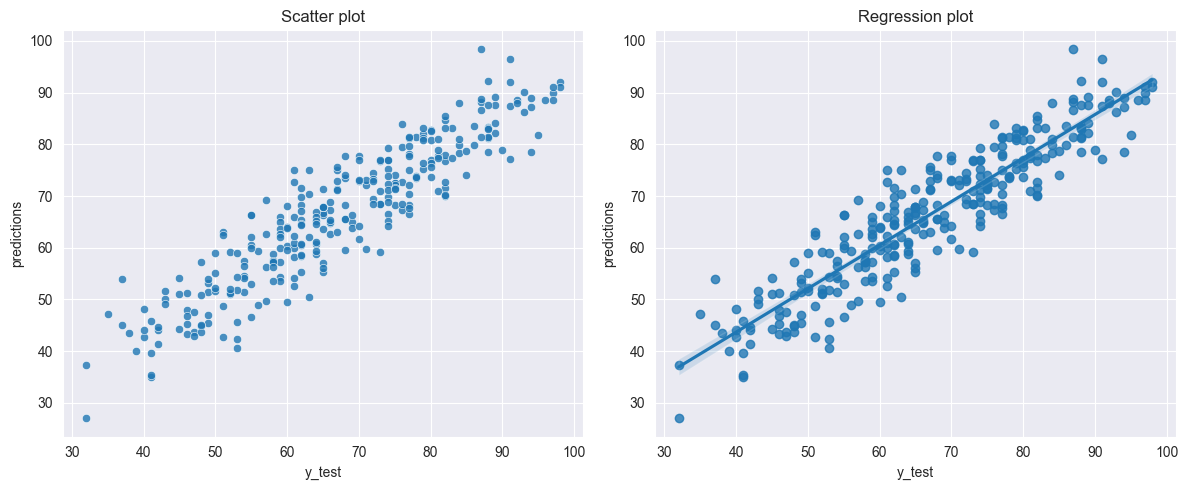

The regression score on training data : 0.8526127947829331
The regression score on testing data : 0.8459414548882465


Plot between y_test and predictions 


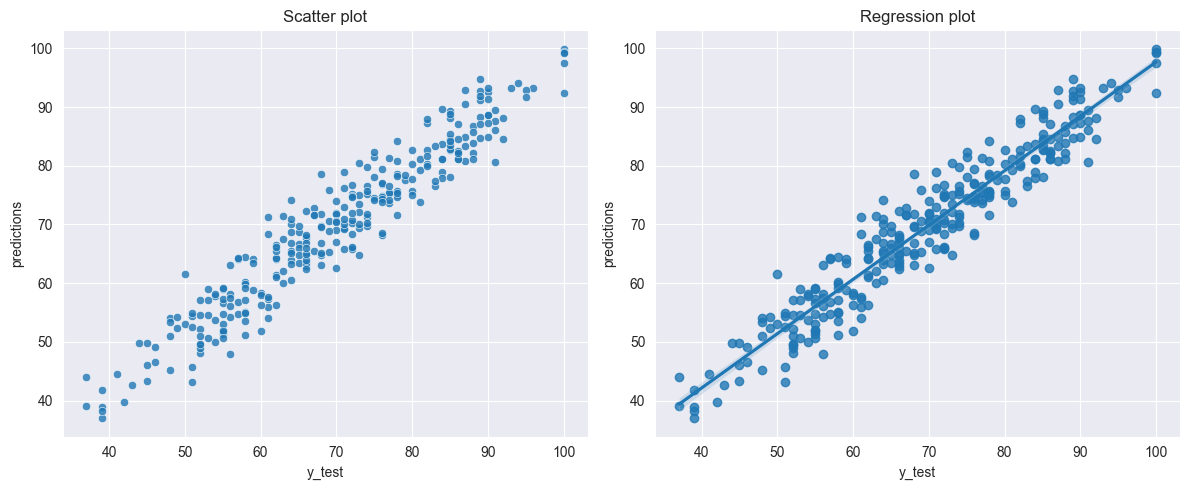

The regression score on training data : 0.9140107447213139
The regression score on testing data : 0.9192974057384575


Plot between y_test and predictions 


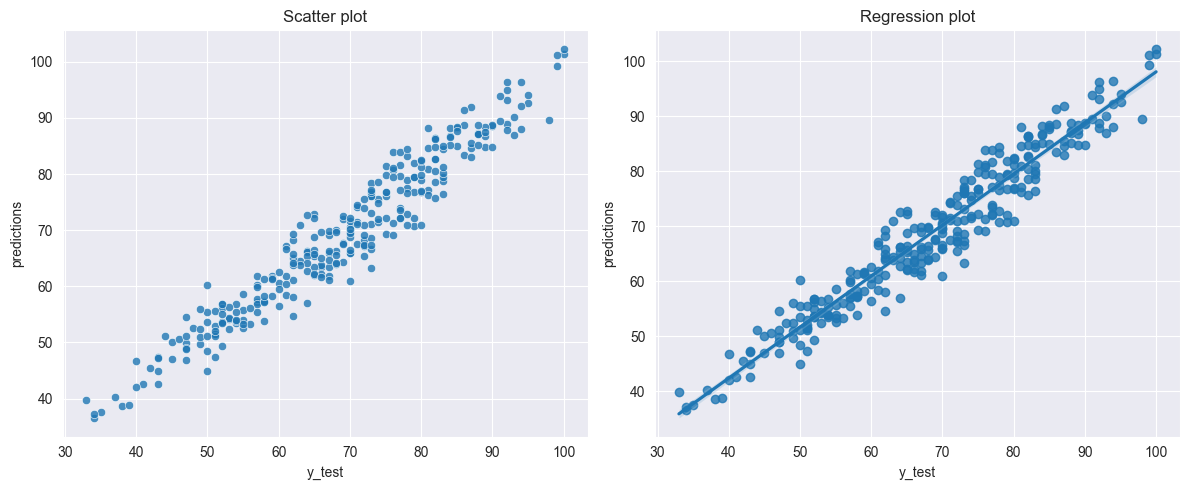

The regression score on training data : 0.9325397602090365
The regression score on testing data : 0.9361574638607061


In [48]:
student_df2=student_df.drop('total score', axis=1)
sns.set_style("darkgrid")
for i in ['math score', 'reading score', 'writing score']:
    X_train, X_test, y_train, y_test = train_test_split(student_df2.drop([i], axis=1), student_df2[i], test_size=0.3, random_state=101)
    
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)
    
    print('\n')
    print('Plot between y_test and predictions ')
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.scatterplot(x=y_test, y=predictions, alpha=0.8);
    plt.xlabel('y_test')
    plt.ylabel('predictions')
    plt.title('Scatter plot')

    plt.subplot(1,2,2)
    sns.regplot(x=y_test, y=predictions)
    plt.xlabel('y_test')
    plt.ylabel('predictions')
    plt.title('Regression plot')

    plt.tight_layout()
    plt.show()
    print('The regression score on training data : {}'.format(LR.score(X_train, y_train)))
    print('The regression score on testing data : {}'.format(LR.score(X_test, y_test)))